<a href="https://colab.research.google.com/github/kellyslpang/unpackAIworkbooks/blob/main/Spotify_Dataset_Tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 60 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 20.4 MB/s 
     |████████████████████████████████| 188 kB 34.0 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 51 kB 296 kB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

# Spotify Dataset

Dataset source : https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=dict_artists.json

The data was first cleaned and narrowed down to :
- Year of release between 1990 and 1999 inclusive.
- "Year" column to extract year from "release_date" field


### Look at the Data

In [3]:
path = Path('gdrive/MyDrive/ai/spotifyDS')

In [4]:
df = pd.read_csv(path/'tracks - 1990-1999.csv', low_memory=False, encoding='utf-8')

In [8]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'Year', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
display(df)

,id,name,popularity,duration_ms,...,liveness,valence,tempo,time_signature
0,3ovjw5HZZv43SxTwApooCM,Wind Of Change,79,312360,...,0.103,0.246,151.505,4
1,1gVgkQFOKa8Wc1HYsJtPdH,More Than Words,74,334107,...,0.113,0.239,91.893,4
2,2nejvFyJeTDtMRP2nUMt0J,Abr??zame Muy Fuerte,74,239427,...,0.126,0.312,135.739,4
3,27XboT5Wb8VOn7A0heo3Ei,Tengo Todo Excepto a Ti,72,272827,...,0.177,0.417,147.977,4
4,1bKQ48M9onID2kbSpRy8kK,Send Me An Angel,71,273333,...,0.211,0.166,80.870,3
...,...,...,...,...,...,...,...,...,...
83708,3HFzjAO51qwy6m0B5dMmhV,En vacker d??d stad,36,193253,...,0.125,0.546,136.020,4
83709,2N1uJbiHpynIyzlIEPKcfb,Ingen ner??t s??ng,24,352133,...,0.379,0.371,84.646,4
83710,4Q4Ve8tVqqP2zB5cPZ5qnu,Fr??n himlen s??nt,23,265307,...,0.107,0.365,123.352,4
83711,3LO7YSHC1MPOMYFJywdxPz,Hj??rter dam,22,250853,...,0.111,0.507,160.302,4


In [32]:
df.sort_values('popularity', ascending=False)[0:10]

,id,name,popularity,duration_ms,...,liveness,valence,tempo,time_signature
44265,7lQWRAjyhTpCWFC0jmclT4,Gangsta's Paradise,83,240693,...,0.3980,0.387,79.974,4
25050,70LcF31zb1H0PyJoS1Sx1r,Creep,83,238640,...,0.1290,0.104,91.844,4
13848,1f3yAtsJtY87CTmM8RLnxf,Smells Like Teen Spirit,83,301920,...,0.1060,0.720,116.761,4
11059,31AOj9sFz2gM0O3hMARRBx,Losing My Religion,83,268427,...,0.0987,0.803,125.639,4
6445,57bgtoPSgt236HzfBOd8kj,Thunderstruck,83,292880,...,0.2170,0.259,133.520,4
79212,48UPSzbZjgc449aqz8bxox,Californication,82,329733,...,0.1270,0.328,96.483,4
45099,1Je1IMUlBXcx1Fz0WE7oPT,Wannabe,81,173027,...,0.1620,0.891,110.008,4
35141,2IZZqH4K02UIYg5EohpNHF,Zombie,81,306427,...,0.3660,0.304,166.973,4
82713,503OTo2dSqe7qk76rgsbep,Still D.R.E.,81,270587,...,0.0543,0.527,93.431,4
13619,3YRCqOhFifThpSRFJ1VWFM,November Rain,81,536067,...,0.1120,0.226,79.759,4


In [ ]:
pd.DataFrame(df.dtypes, columns=['DataType'])[0:20]

,DataType
id,object
name,object
popularity,int64
duration_ms,int64
explicit,int64
artists,object
id_artists,object
release_date,object
Year,int64
danceability,float64


In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
pd.isnull(df).sum()[0:20]

id                  0
name                3
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
Year                0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
df.dropna(inplace = True)
#df.fillna(df.mean())

In [ ]:
dep_var = 'popularity'
#df[dep_var] = np.log(df[dep_var])

### Using TabularPandas and TabularProc

In [ ]:
procs = [Categorify, FillMissing]
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
cont, cat = cont_cat_split(df, 1, dep_var=dep_var) #define continuous and categorical data

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train),len(to.valid)

(66968, 16742)

In [ ]:
df.corr()

,popularity,duration_ms,explicit,Year,...,liveness,valence,tempo,time_signature
popularity,1.000000,0.030211,0.141912,0.116708,...,-0.005223,-0.020226,-0.012640,0.022975
duration_ms,0.030211,1.000000,0.006890,0.020134,...,-0.016017,-0.150399,0.008407,0.051823
explicit,0.141912,0.006890,1.000000,0.051497,...,0.020970,0.000417,-0.025360,0.030492
Year,0.116708,0.020134,0.051497,1.000000,...,0.005092,-0.001619,0.002172,0.023079
danceability,0.030625,-0.092810,0.085301,0.047268,...,-0.108702,0.565278,-0.123499,0.126800
energy,0.098148,0.019645,0.107872,0.107487,...,0.137593,0.409191,0.183805,0.174923
key,0.014572,0.009984,0.012578,0.002046,...,-0.017063,0.022832,0.000842,0.011114
loudness,0.119850,-0.001907,0.097415,0.205504,...,0.050441,0.271126,0.140638,0.126351
mode,0.028959,-0.052747,-0.018376,-0.024415,...,0.007280,0.008636,0.017283,-0.009771
speechiness,0.005909,-0.185599,0.107515,0.008426,...,0.251102,0.051659,-0.120212,-0.110810


In [ ]:
#(df['name'].value_counts(dropna=False) -1).sum()
df['name'].value_counts(dropna=False)

????????????                                    968
???????????????                                 637
??????                                          610
?????????                                       463
??????????????????                              361
                                               ... 
I'm With You                                      1
Pikkulintu riemuissaan - A Joyous Tiny Bird       1
One Step Ahead                                    1
Acontece / Dom de Iludir                          1
?????????? ???????????????????? ????????????      1
Name: name, Length: 68485, dtype: int64

In [ ]:
to.show()

,id,name,artists,id_artists,release_date,duration_ms,explicit,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
83196,6g67xucffrJ5QaHps1WZxo,Un medico,['Fabrizio De Andr??'],['19HiWVd2g0XyJstBsbW2Qm'],3/12/1999,160040,0,1999,0.409,0.300,9,-13.939,1,0.0905,0.9360,0.089000,0.1050,0.561,56.198002,5,22
11515,6UzFxm6t1Rb0WHbuj2e2Fx,WILD AT NIGHT,['Kyosuke Himuro'],['0ZSqL5iXTuBWy7ur7vT2lP'],6/4/1991,173053,0,1991,0.469,0.996,0,-3.330,1,0.1130,0.0018,0.070800,0.3440,0.454,95.738998,4,23
16671,2AfNslDVRqp7juchcjU9yi,???????????????,['??????'],['1bONVLlQIiuULYblokrPxj'],1/1/1992,183809,0,1992,0.303,0.253,6,-9.950,1,0.0289,0.9810,0.043100,0.1260,0.359,93.967003,4,16
82660,5d8haSstbkl4k9S3G9vsTF,Chillando Goma,['Fulanito'],['0hD97064k3LBUrRvfT42SE'],15/11/1999,250867,0,1999,0.834,0.639,2,-8.874,1,0.1070,0.1140,0.000000,0.0936,0.784,118.041000,4,46
68871,76NG8qyKwlmZiiq2bHWRv2,El Tanguito,['Los Gardelitos'],['1WXAndtMSMymA6qMXyvoXV'],1/5/1998,38587,0,1998,0.506,0.524,7,-7.560,1,0.1010,0.3270,0.859000,0.0452,0.964,160.755005,4,25
69910,2wBMTTtWVE3IMLka0wBGtW,"??????, ????????????",['B.T.R.'],['3mF9V7H7yo9AwMXHt08Q9f'],15/6/1998,253827,0,1998,0.535,0.678,1,-6.826,1,0.0286,0.2010,0.000004,0.0770,0.136,116.043999,4,13
63183,6qB2W0DcQo2kLyqw2JUo5k,You Send Me (with Michael Bolton),"['Kenny G', 'Michael Bolton']","['6I3M904Y9IwgDjrQ9pANiB', '6YHEMoNPbcheiWS2haGzkn']",8/11/1997,244827,0,1997,0.509,0.323,7,-14.787,0,0.0258,0.4670,0.000010,0.2040,0.337,96.250999,3,49
61577,7tUZtyjpKHgD97DpAEJ51r,El Ilegal,['Joan Sebastian'],['7FsRH5bw8iWpSbMX1G7xf1'],28/8/1997,170075,0,1997,0.673,0.625,4,-5.556,1,0.0418,0.7440,0.000000,0.0774,0.924,101.295998,4,38
66460,3D9G36zqT9GmNtzoJJiyXt,Gott ist tot,"['Original (German) Cast of ""Tanz Der Vampire""']",['2SjQ6zgyi8TSLI2uyKm8Hm'],1/1/1998,238467,0,1998,0.184,0.330,4,-11.514,0,0.0391,0.7390,0.000155,0.2060,0.070,70.900002,4,30
1616,5i0gXwRlTyKn9b0eyLNxcM,In Rosa`s heart,['Steinar Albrigtsen'],['2qRjrCuBQJqlU8Nwb92kao'],1/1/1990,182400,0,1990,0.573,0.354,2,-11.897,1,0.0302,0.4670,0.000000,0.2110,0.726,122.042999,4,21


In [ ]:
to1 = TabularPandas(df, procs, ['id','name', 'key', 'time_signature'], [], y_names=dep_var, splits=splits)
to1.show(3)

,id,name,key,time_signature,popularity
68422,6Qrk94AQ9tndHSDsr7a9yg,Papatya,2,4,23
64938,4PtlmCBNoaUiNG1mGfT16a,25 Bofetadas,4,4,7
31831,5G3DIojPwYLhkgem62QmFU,Da Lama ao Caos,11,4,48


However, the underlying items are all numeric:

In [ ]:
to.items.head(3)

,id,name,popularity,duration_ms,...,liveness,valence,tempo,time_signature
68422,69487,47505,23,186907,...,0.0709,0.761,116.574997,4
64938,47560,2591,7,269800,...,0.0911,0.273,143.960007,4
31831,56761,16953,48,271800,...,0.1130,0.396,102.550003,4


In [ ]:
to1.items[['id','name', 'key', 'time_signature']].head(3)

,id,name,key,time_signature
68422,69487,47505,3,4
64938,47560,2591,5,4
31831,56761,16953,12,4


In [ ]:
save_pickle(path/'toSpot.pkl',to)

Now that all this preprocessing is done, we are ready to create a decision tree.

### Creating the Decision Tree

In [9]:
to = load_pickle(path/'toSpot.pkl')

In [10]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y
m = DecisionTreeRegressor(max_leaf_nodes=8)
m.fit(xs, y);

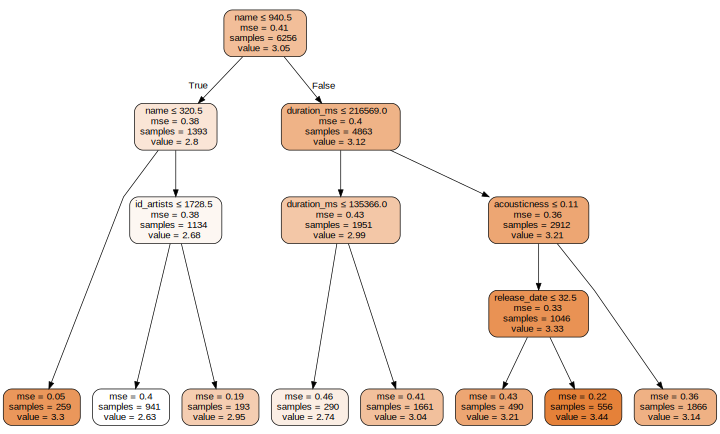

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

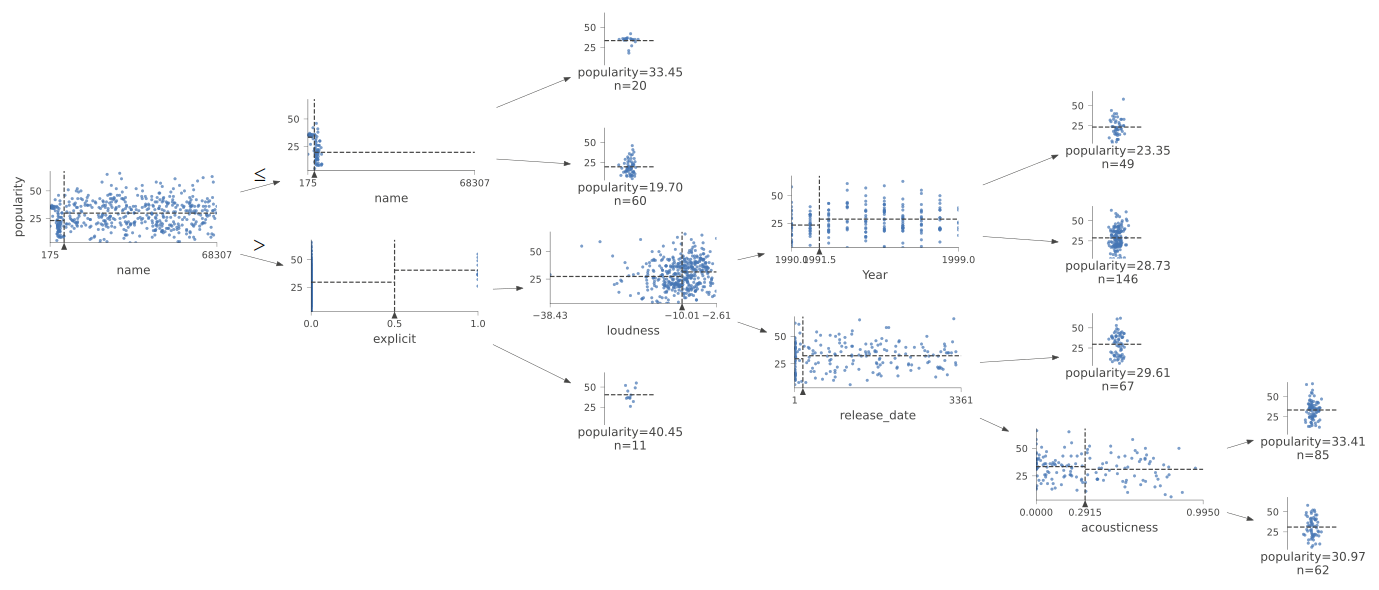

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [11]:
def r_mse(pred,y): 
    return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y): 
    return r_mse(m.predict(xs), y)

In [12]:
m_rmse(m, xs, y)

12.750662

In [13]:
m_rmse(m, valid_xs, valid_y)

12.814858

In [14]:
m = DecisionTreeRegressor(min_samples_leaf=50)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(11.394191, 12.566136)

In [ ]:
m.get_n_leaves()

1031

## Random Forests

In [5]:
# pip install —pre -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn —U

### Creating a Random Forest

In [15]:
def rf(xs, y, n_estimators=30, max_samples=50000, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                                 max_samples=max_samples, max_features=max_features,
                                 min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(8.168163, 11.752739)

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
r_mse(preds.mean(0), valid_y)

11.752739

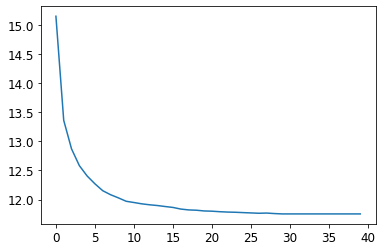

In [ ]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

### Out-of-Bag Error

In [ ]:
r_mse(m.oob_prediction_, y)

11.869144

## Model Interpretation

### Tree Variance for Prediction Confidence

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
preds.shape

(30, 16742)

In [ ]:
preds_std = preds.std(0)

In [ ]:
preds_std[:10]

array([11.45854559,  8.5598379 ,  7.9066602 ,  2.36327636,  9.56236374, 11.026245  , 10.29751092, 10.52381831,  8.15558304, 11.85217181])

### Feature Importance

In [16]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [17]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
1,name,0.260432
2,artists,0.126380
11,loudness,0.072959
4,release_date,0.072521
3,id_artists,0.070072
6,explicit,0.059889
7,Year,0.051146
14,acousticness,0.049575
5,duration_ms,0.048022
13,speechiness,0.035850


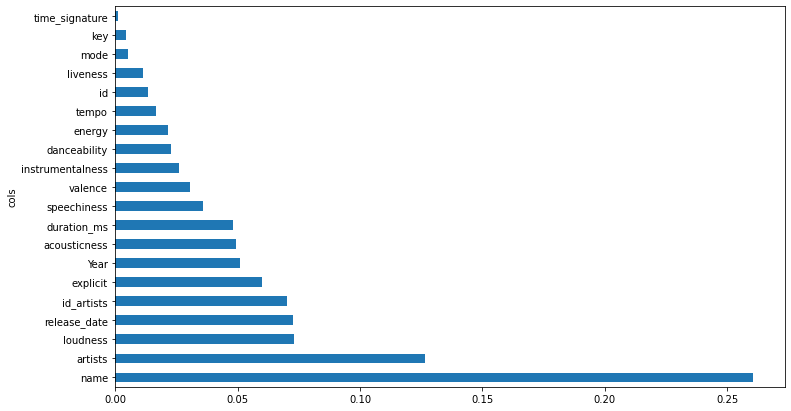

In [18]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [19]:
to_keep = fi[fi.imp>0.03].cols
len(to_keep)

11

In [20]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [21]:
m = rf(xs_imp, y)

In [22]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(8.473657, 11.527287)

In [ ]:
len(xs.columns), len(xs_imp.columns)

(20, 16)

In [23]:
to_drop = ['id', 'name', 'id_artists']


In [24]:
xs_imp2 = xs_imp.drop(to_drop, axis=1)
valid_xs_imp2 = valid_xs_imp.drop(to_drop, axis=1)

KeyError: ignored

### Removing Redundant Features

Let's start with:

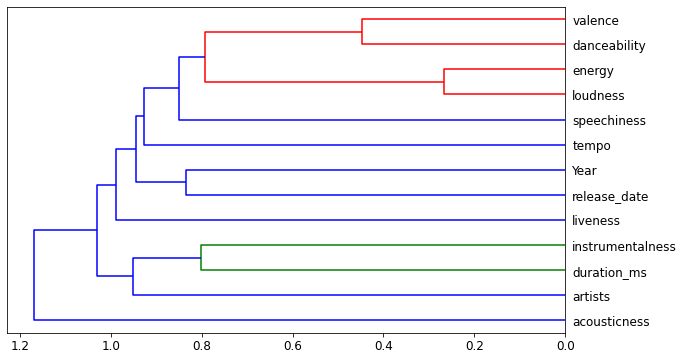

In [ ]:
cluster_columns(xs_imp2)

In [ ]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
                              max_samples=200, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

Here's our baseline:

In [ ]:
get_oob(xs_imp2)

0.0813818189723523

Now we try removing each of our potentially redundant variables, one at a time:

In [ ]:
#{c:get_oob(xs_imp2.drop(c, axis=1)) for c in (
    'danceability', 'valence', 'loudness','energy')}

{'danceability': 0.05270373824577923,
 'energy': 0.05689480035122574,
 'loudness': 0.04534725249691607,
 'valence': 0.05219376651722385}

Now let's try dropping multiple variables. We'll drop one from each of the tightly aligned pairs we noticed earlier. Let's see what that does:

In [ ]:
to_drop = ['valence', 'energy']
get_oob(xs_imp2.drop(to_drop, axis=1))

0.055804764782409366

In [ ]:
xs_final = xs_imp2.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp2.drop(to_drop, axis=1)

In [ ]:
#xs_final = xs_imp2
#valid_xs_final = valid_xs_imp2

In [ ]:
len(xs_final.columns), len(valid_xs_final.columns)

(11, 11)

In [ ]:
xs_final.columns, valid_xs_final.columns

(Index(['artists', 'loudness', 'release_date', 'duration_ms', 'acousticness',
        'speechiness', 'danceability', 'tempo', 'liveness', 'instrumentalness',
        'Year'],
       dtype='object'),
 Index(['artists', 'loudness', 'release_date', 'duration_ms', 'acousticness',
        'speechiness', 'danceability', 'tempo', 'liveness', 'instrumentalness',
        'Year'],
       dtype='object'))

In [ ]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

We can load them back later with:

In [27]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

Now we can check our RMSE again, to confirm that the accuracy hasn't substantially changed.

In [ ]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(8.767516, 12.100523)

In [ ]:
fi = rf_feat_importance(m, xs_final)
fi[:10]

,cols,imp
0,artists,0.165243
1,loudness,0.107481
2,release_date,0.101685
4,acousticness,0.097232
5,speechiness,0.090861
3,duration_ms,0.090050
6,danceability,0.082271
7,tempo,0.078231
8,liveness,0.070035
9,instrumentalness,0.062937


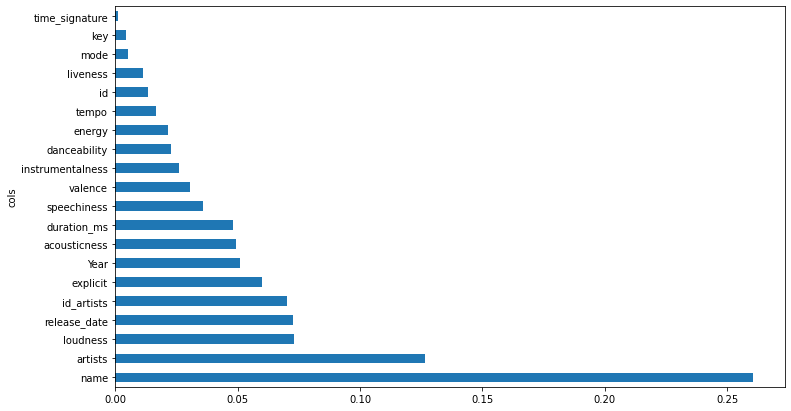

In [25]:
plot_fi(fi[:30]);

### Tree Interpreter

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [ ]:
row = valid_xs_final.iloc[:5]

In [ ]:
prediction, bias, contributions = treeinterpreter.predict(m, row.values)

In [ ]:
prediction[0], bias[0], contributions[0].sum()

(array([30.84781089]), 29.740044, 1.1077668928108932)

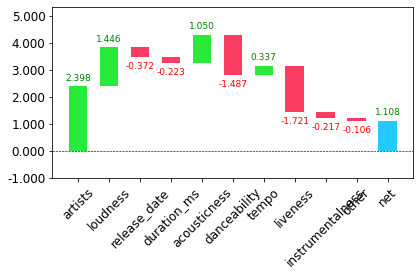

In [ ]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

##Next Steps:
- Use the full dataset
- Put it through a Neural Network
- Compare feature importance between decades